# Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments, and the progression of disease epidemics.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
import operator
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
# Step 1: Create Dummy Data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + np.random.normal(-3, 3, 20)

In [3]:
# Reshaping for the model
X = x[:, np.newaxis]
y = y[:, np.newaxis]


In [4]:
# Step 2: Polynomial Transformation
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(X)


In [5]:
# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

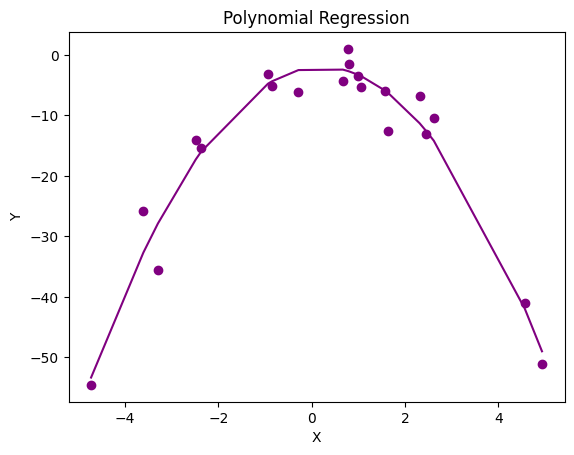

In [6]:
# Step 4: Plotting the results
plt.scatter(x, y, color='purple')
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sorted_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='purple')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [8]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

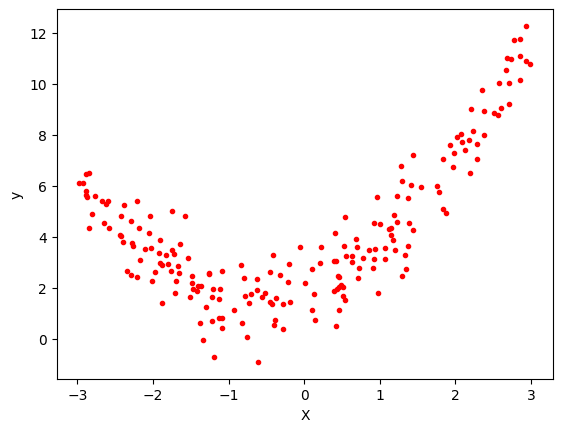

In [9]:
plt.plot(X, y,'r.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [10]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
# Applying linear regression
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

-0.10256844155623623

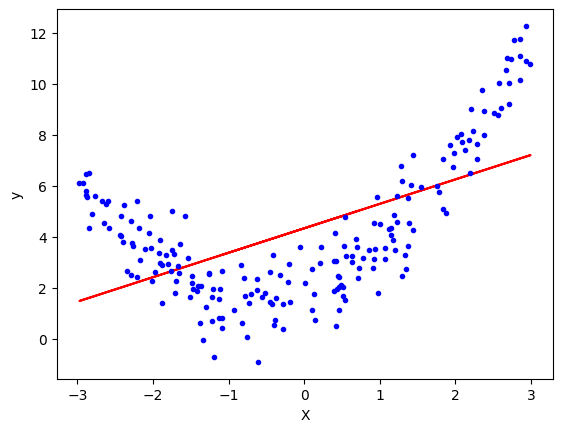

In [14]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [15]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [16]:
print(X_train[0])
print(X_train_trans[0])

[0.68379574]
[1.         0.68379574 0.46757661]


In [17]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [18]:
LinearRegression()

LinearRegression()

In [19]:
y_pred = lr.predict(X_test_trans)

In [20]:
r2_score(y_test,y_pred)

0.794068254051798

In [21]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.95816223 0.79045832]]
[1.9421365]


In [22]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

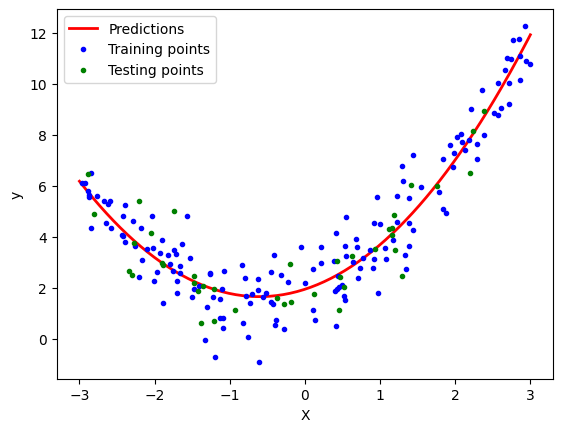

In [23]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

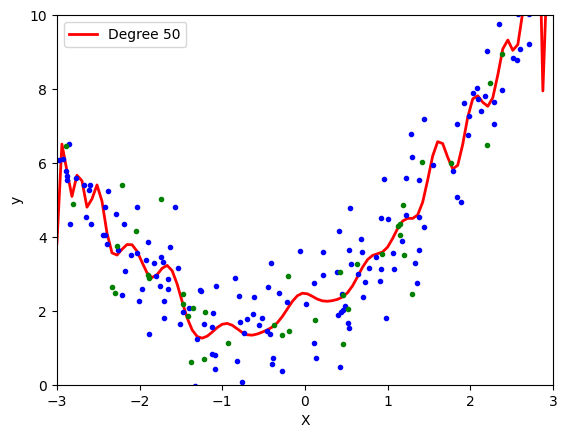

In [24]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()
polynomial_regression(50)

In [25]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

c:\Users\DELL\miniconda3\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


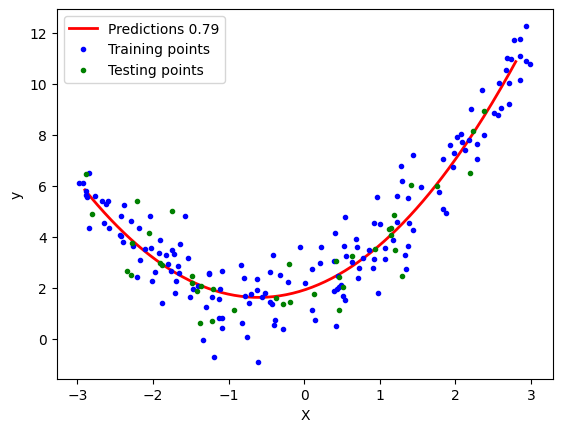

In [26]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [27]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [39]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [29]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [30]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [31]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [32]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [33]:
print("Input:", X_multi_trans.shape[1])
print("Output:", X_multi_trans.shape[1])
print("Powers:\n", poly.powers_)

Input: 6
Output: 6
Powers:
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [34]:
X_multi_trans.shape

(100, 6)

In [35]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [36]:
X_test_multi = poly.transform(final)

In [37]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [38]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))
fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))
fig.show()